In [95]:
import missingno as msno
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\swiif\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### 1. EDA
* Prepare DF
* Preview the data 
* Check for missing fields
* Check for duplicates

In [66]:
df = pd.read_csv('../data/clickbait_title_classification.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      32000 non-null  object
 1   clickbait  32000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 500.1+ KB


In [67]:
df.head()

,title,clickbait
0,""".asia"" domain applications near 300,000 on op...",0
1,"""1 Indian + 1 Indian = Unrelatable"": Televisio...",1
2,"""7th Heaven"" television series comes to an end",0
3,"""Arm Glow"" Is Your New Life Goal, Thanks To Lu...",1
4,"""Beans Memes"" Is The Only Twitter Account That...",1


In [68]:
if df.isnull().values.any():
    print(f"There are {df.isna().sum()} missing values in the dataset.")
    msno.matrix(df)
else:
    print("No missing values found in the dataset.")

No missing values found in the dataset.


In [69]:
if df.duplicated().any():
    print(f"There are {df.duplicated().sum()} duplicate rows in the dataset.")#
    df = df.drop_duplicates()
else:
    print("No duplicate rows found in the dataset.")

No duplicate rows found in the dataset.


<Figure size 800x500 with 0 Axes>

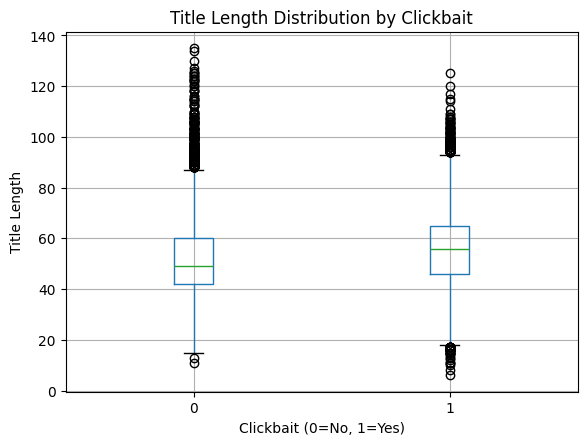

In [70]:
if 'title_length' not in df.columns:
	df['title_length'] = df['title'].str.len()

plt.figure(figsize=(8, 5))
df.boxplot(column='title_length', by='clickbait')
plt.xlabel('Clickbait (0=No, 1=Yes)')
plt.ylabel('Title Length')
plt.title('Title Length Distribution by Clickbait')
plt.suptitle('')
plt.show()

Interesting there are some really short titles.

In [91]:
df[df['title_length'] < 17].head(10)

,title,clickbait,title_length,title_world_count,title_uppercase_count,number_of_special_characters,digit_count,has_number,starts_with_question,contains_quotation,contains_pronoun,average_word_length
5778,33 Bad Puns,1,11,3,2,0,2,True,False,False,False,3.0000
6507,9 Period Hacks,1,14,3,2,0,1,True,False,False,False,4.0000
6539,9 Times I Cried,1,15,4,3,0,1,True,False,False,True,3.0000
7873,Are Emojis Words,1,16,3,3,0,0,False,True,False,False,4.6667
7931,Are You Dead,1,12,3,3,0,0,False,True,False,False,3.3333
8788,BFWKND,1,6,1,6,0,0,False,False,False,False,6.0000
9780,COCK BLOCK,1,10,2,9,0,0,False,False,False,False,4.5000
11510,DIY Sugar Wax,1,13,3,5,0,0,False,False,False,True,3.6667
11985,Do You Have ESP,1,15,4,6,0,0,False,True,False,False,3.0000
14408,Goys Try Latkes,1,15,3,3,0,0,False,False,False,False,4.3333


In [92]:
df[df['title_length'] > 120].head(10)

,title,clickbait,title_length,title_world_count,title_uppercase_count,number_of_special_characters,digit_count,has_number,starts_with_question,contains_quotation,contains_pronoun,average_word_length
8673,Australian rules football: West Gippsland Latr...,0,126,16,10,1,0,False,False,False,True,6.9375
9866,"Cambridge, Mass., city council recommends cons...",0,127,17,8,5,0,False,False,False,True,6.5294
10617,Catholic Democrats tell Chicago Cardinal Georg...,0,125,16,5,1,0,False,False,False,True,6.8750
10664,"Champaign, Illinois mayor doubts Obama's natur...",0,123,15,3,4,0,False,False,False,True,7.2667
11156,Common Sense Advisory announces size of worldw...,0,135,19,3,0,2,True,False,False,False,6.1579
12574,England; Australia set to battle for right to ...,0,124,20,8,5,4,True,False,False,True,5.2500
18301,Liberal Democrats defeated in UK elections aft...,0,130,18,5,1,0,False,False,False,True,6.2778
20763,Opposition motions in Australian House of Repr...,0,125,19,5,0,0,False,False,False,True,5.6316
20969,Palestinian security forces clash with militan...,0,122,15,6,1,0,False,False,False,True,7.2000
24516,Teen charged with seven felonies related to th...,0,125,17,3,1,0,False,False,False,True,6.4118


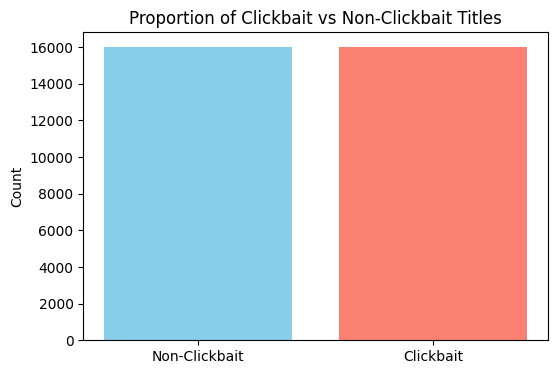

In [73]:
clickbait_counts = df['clickbait'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(['Non-Clickbait', 'Clickbait'], clickbait_counts, color=['skyblue', 'salmon'])
plt.ylabel('Count')
plt.title('Proportion of Clickbait vs Non-Clickbait Titles')
plt.show()

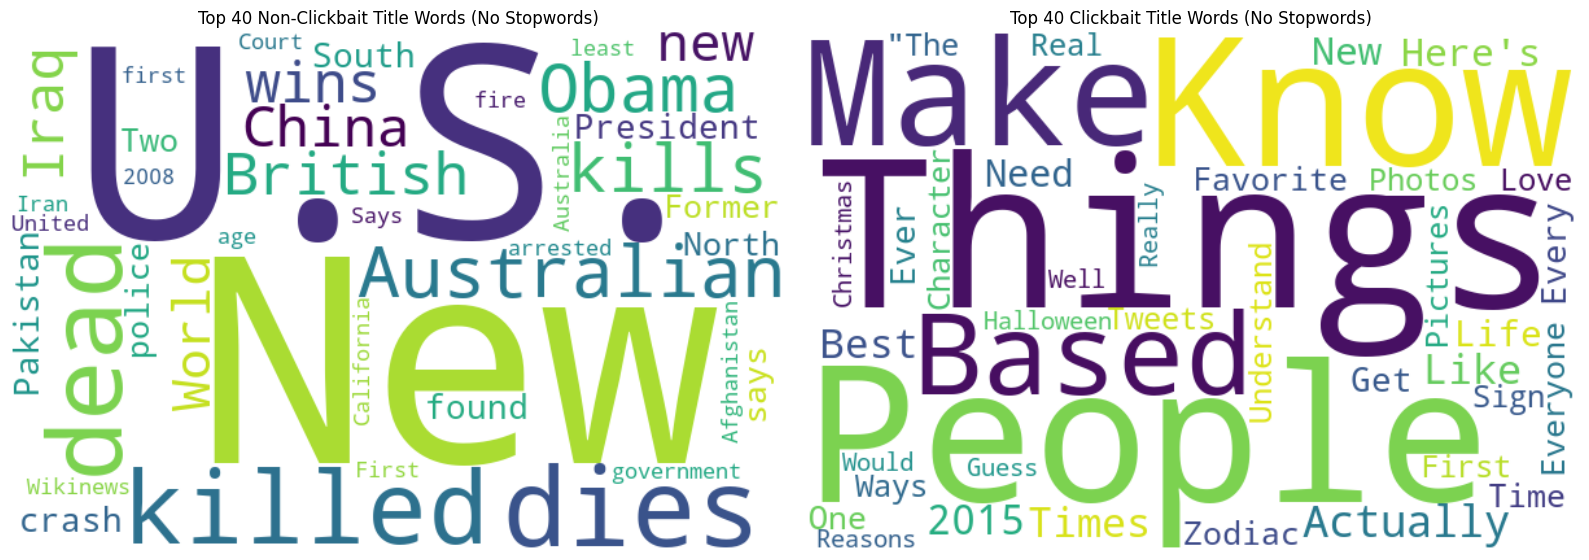

In [74]:
top_n = 40  # Change this value for more or fewer words

stop_words = set(stopwords.words('english'))

non_clickbait_titles = ' '.join(df[df['clickbait'] == 0]['title'])
words_non = [word for word in non_clickbait_titles.split() if len(word) > 2 and word.lower() not in stop_words]
wordcloud_non = WordCloud(width=600, height=400, background_color='white', max_words=top_n).generate_from_frequencies(Counter(words_non))

clickbait_titles = ' '.join(df[df['clickbait'] == 1]['title'])
words_click = [word for word in clickbait_titles.split() if len(word) > 2 and word.lower() not in stop_words]
wordcloud_click = WordCloud(width=600, height=400, background_color='white', max_words=top_n).generate_from_frequencies(Counter(words_click))

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].imshow(wordcloud_non, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title(f'Top {top_n} Non-Clickbait Title Words (No Stopwords)')
axes[1].imshow(wordcloud_click, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title(f'Top {top_n} Clickbait Title Words (No Stopwords)')
plt.tight_layout()
plt.show()

#### 2. Data Engeneering

##### Length of the Title

count    32000.000000
mean        53.804063
std         14.774600
min          6.000000
25%         44.000000
50%         52.000000
75%         63.000000
max        135.000000
Name: title_length, dtype: float64

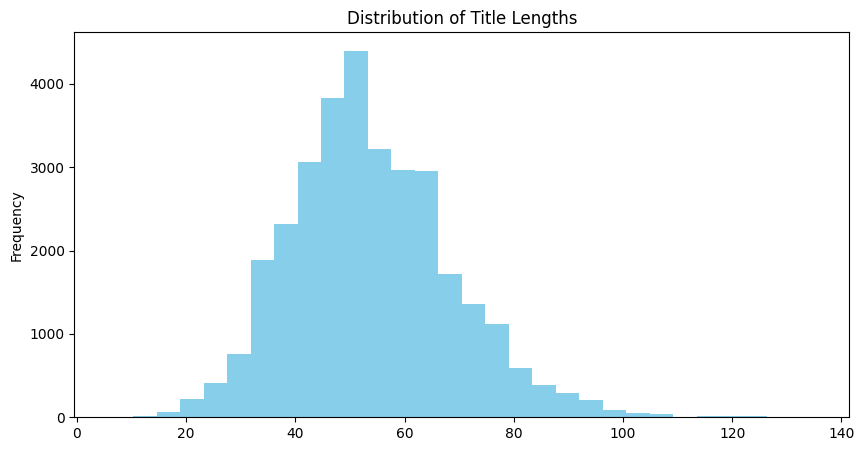

In [75]:
if 'title_length' not in df.columns:
	df['title_length'] = df['title'].str.len()


df['title_length'].plot(kind='hist', bins=30, figsize=(10, 5), color='skyblue', title='Distribution of Title Lengths')
df['title_length'].describe()


##### Number of Words in The Title

count    32000.000000
mean         9.065156
std          2.603603
min          1.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         26.000000
Name: title_world_count, dtype: float64

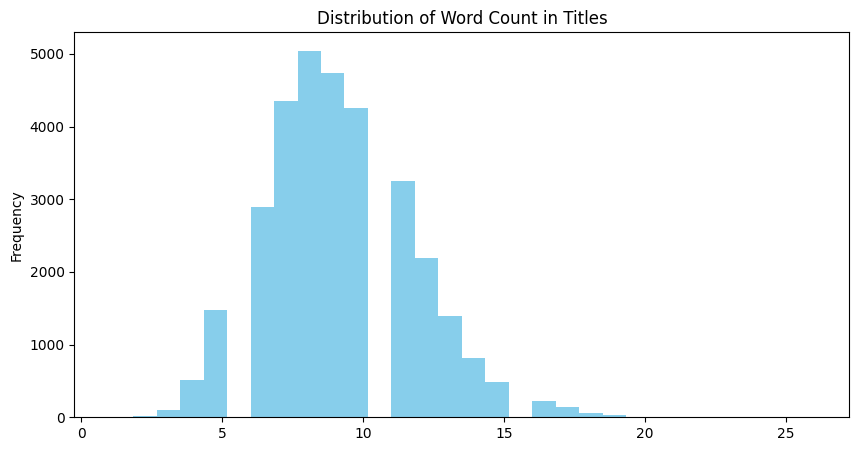

In [76]:
if 'title_world_count' not in df.columns:
    df['title_world_count'] = df['title'].str.split().apply(len)
    
df['title_world_count'].plot(kind='hist', bins=30, figsize=(10, 5), color='skyblue', title='Distribution of Word Count in Titles')
df['title_world_count'].describe()

##### Number Of Uppercase Worlds in Title

count    32000.000000
mean         7.159656
std          3.681163
min          0.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         30.000000
Name: title_uppercase_count, dtype: float64

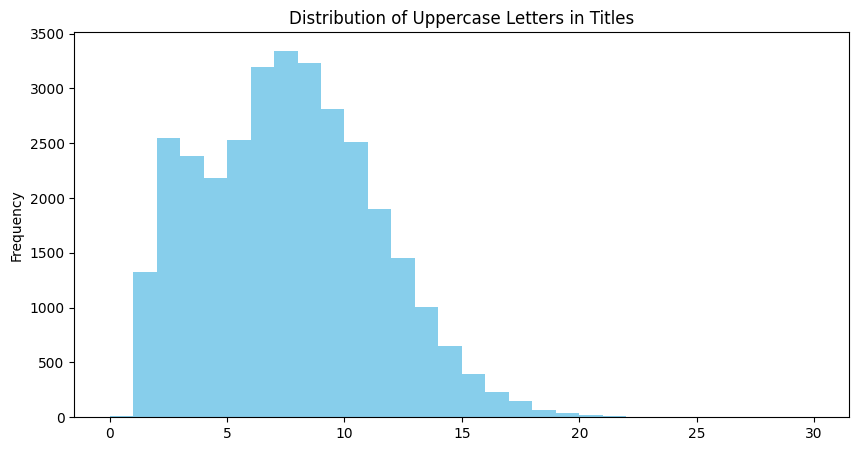

In [77]:
if 'title_uppercase_count' not in df.columns:
    df['title_uppercase_count'] = df['title'].apply(lambda x: sum(1 for c in x if c.isupper()))
    
df['title_uppercase_count'].plot(bins=30, figsize=(10, 5), kind='hist', color='skyblue', title='Distribution of Uppercase Letters in Titles')
df['title_uppercase_count'].describe()

##### Number of Special Characters

count    32000.000000
mean         0.744750
std          1.053687
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         10.000000
Name: number_of_special_characters, dtype: float64

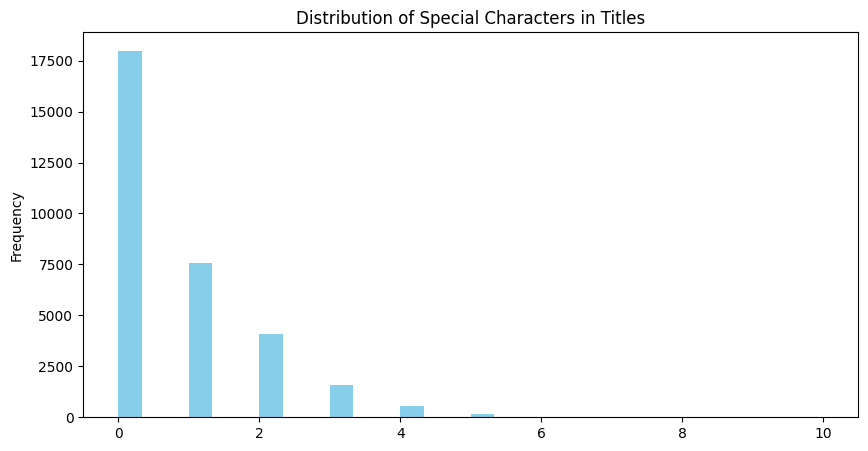

In [78]:
if 'number_of_special_characters' not in df.columns:
    df['number_of_special_characters'] = df['title'].apply(lambda x: sum(1 for c in x if not c.isalnum() and not c.isspace()))
    
df['number_of_special_characters'].plot(kind='hist', bins=30, figsize=(10, 5), color='skyblue', title='Distribution of Special Characters in Titles')
df['number_of_special_characters'].describe()

##### Has Numbers in the title

In [79]:
df['digit_count'] = df['title'].apply(lambda x: sum(1 for c in x if c.isdigit()))
print(df['digit_count'].value_counts().sort_index())

digit_count
0     21962
1       975
2      6766
3       487
4       968
5       159
6       589
7        33
8        44
9         7
10        9
16        1
Name: count, dtype: int64


count     32000
unique        2
top       False
freq      21962
Name: has_number, dtype: object

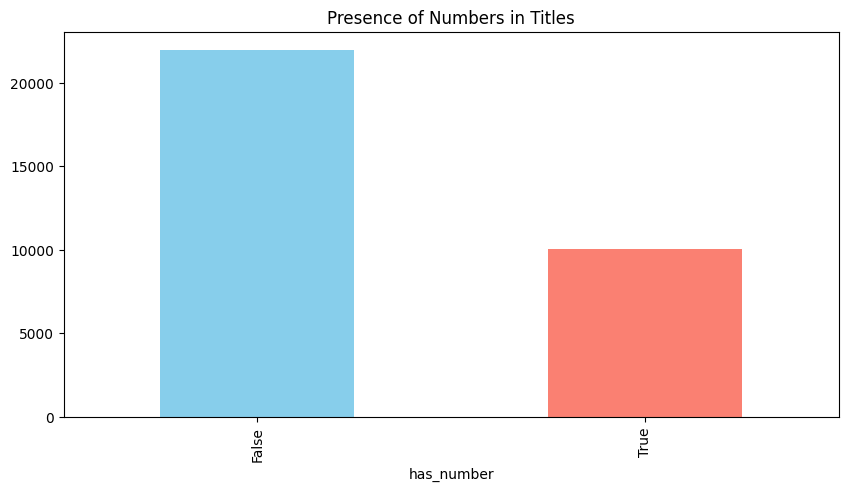

In [80]:
if 'has_number' not in df.columns:
    df['has_number'] = df['title'].str.contains(r'\d', na=False)
    
df['has_number'].value_counts().plot(kind='bar', figsize=(10, 5), color=['skyblue', 'salmon'], title='Presence of Numbers in Titles')
df['has_number'].describe()

##### Uppercase Lowercase Ratio (Not Useful For This Dataset)

count    32000.000000
mean         0.160905
std          0.114880
min          0.000000
25%          0.097561
50%          0.173913
75%          0.212766
max         10.500000
Name: upper_lower_ratio, dtype: float64

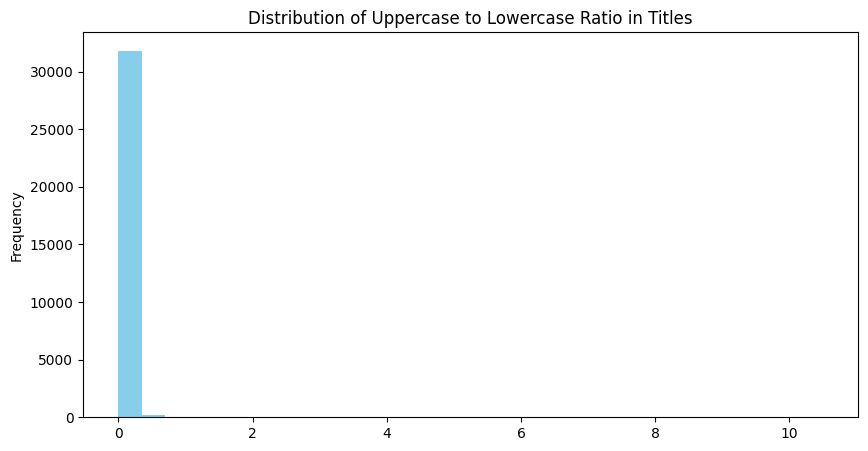

In [81]:
if 'upper_lower_ratio' not in df.columns:
    df['upper_lower_ratio'] = df['title_uppercase_count'] / (df['title_length'] - df['title_uppercase_count']).replace(0, 1)

df['upper_lower_ratio'].plot(kind='hist', bins=30, figsize=(10, 5), color='skyblue', title='Distribution of Uppercase to Lowercase Ratio in Titles')
df['upper_lower_ratio'].describe()

##### Starts with the Question

starts_with_question
False    29300
True      2700
Name: count, dtype: int64

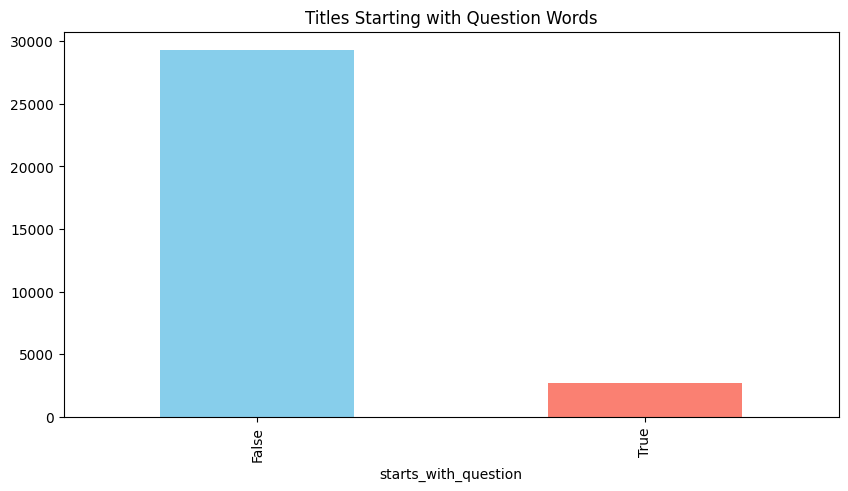

In [82]:
if 'starts_with_question' not in df.columns:
    df['starts_with_question'] = df['title'].str.startswith(('What', 'How', 'Why', 'Is', 'Are', 'Do', 'Does', 'Did', 'Can', 'Could', 'Will', 'Would'))

df['starts_with_question'].value_counts().plot(kind='bar', figsize=(10, 5), color=['skyblue', 'salmon'], title='Titles Starting with Question Words')
df['starts_with_question'].value_counts()

##### Number of Superlatives (Not Useful For This Dataset)

count    32000.000000
mean         0.046938
std          0.214005
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: number_of_superlatives, dtype: float64

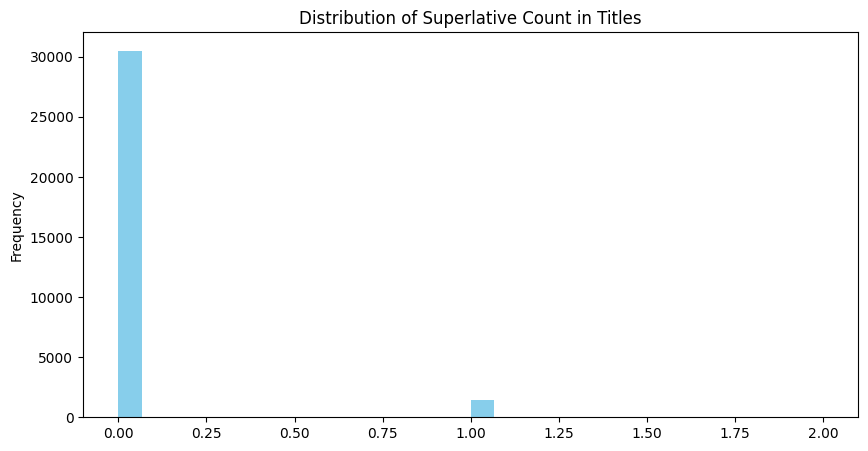

In [83]:
if 'number_of_superlatives' not in df.columns:
    superlatives = ['best', 'worst', 'greatest', 'most', 'least', 'biggest', 'smallest', 'highest', 'lowest', 'top', 'bottom']
    df['number_of_superlatives'] = df['title'].apply(lambda x: sum(1 for word in x.lower().split() if word in superlatives))
    
df['number_of_superlatives'].plot(kind='hist', bins=30, figsize=(10, 5), color='skyblue', title='Distribution of Superlative Count in Titles')
df['number_of_superlatives'].describe()



##### Contains Exclamation (Not Useful For This Dataset)

count     32000
unique        2
top       False
freq      31962
Name: contains_exclamation, dtype: object

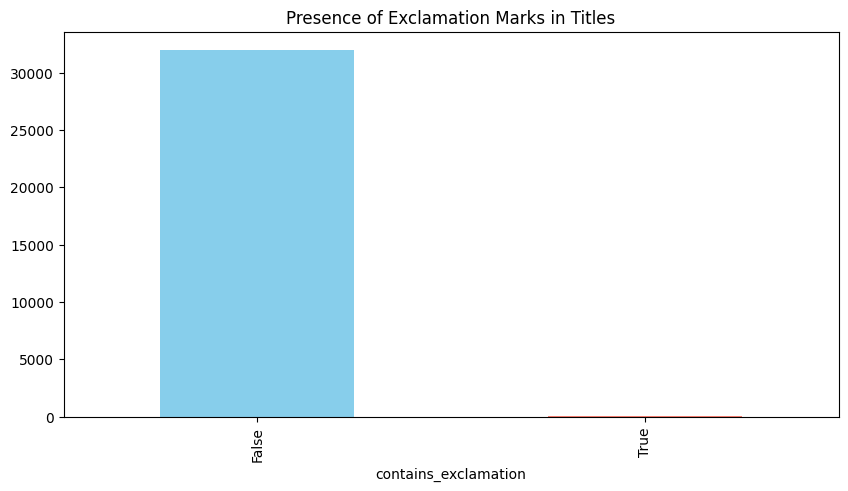

In [84]:
if 'contains_exclamation' not in df.columns:
    df['contains_exclamation'] = df['title'].str.contains('!', case=False, na=False)
    
df['contains_exclamation'].value_counts().plot(kind='bar', figsize=(10, 5), color=['skyblue', 'salmon'], title='Presence of Exclamation Marks in Titles')
df['contains_exclamation'].describe()

##### Contains Question Marks (Not Useful For This Dataset)

count     32000
unique        2
top       False
freq      31840
Name: contains_question_mark, dtype: object

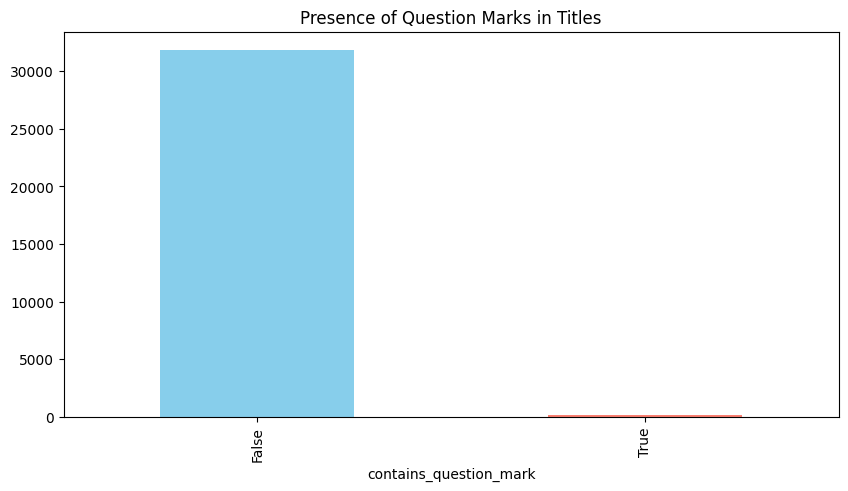

In [85]:
if 'contains_question_mark' not in df.columns:
    df['contains_question_mark'] = df['title'].str.contains('?', case=False, na=False, regex=False)

df['contains_question_mark'].value_counts().plot(kind='bar', figsize=(10, 5), color=['skyblue', 'salmon'], title='Presence of Question Marks in Titles')
df['contains_question_mark'].describe()

##### Contains Quotation Marks (Might Be Useful For This Dataset)

count     32000
unique        2
top       False
freq      29430
Name: contains_quotation, dtype: object

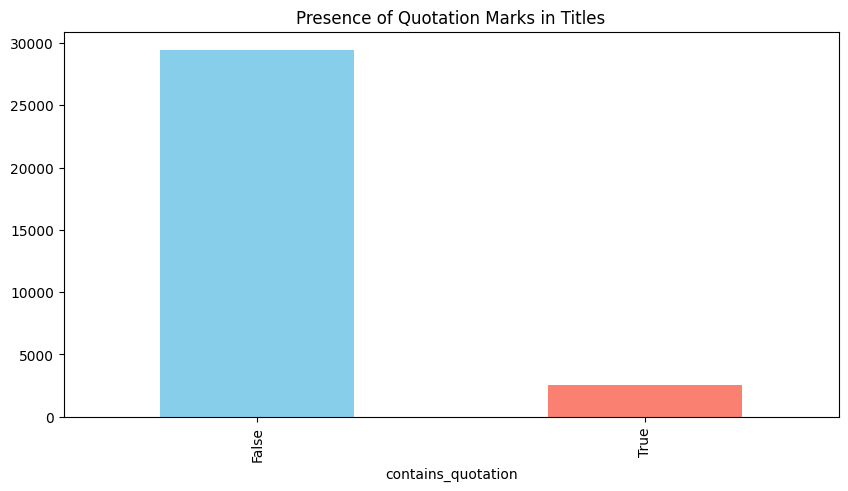

In [86]:
if 'contains_quotation' not in df.columns:
    df['contains_quotation'] = df['title'].str.contains('"', case=False, na=False)
    
df['contains_quotation'].value_counts().plot(kind='bar', figsize=(10, 5), color=['skyblue', 'salmon'], title='Presence of Quotation Marks in Titles')
df['contains_quotation'].describe()

##### Contains Pronoun

count     32000
unique        2
top        True
freq      25077
Name: contains_pronoun, dtype: object

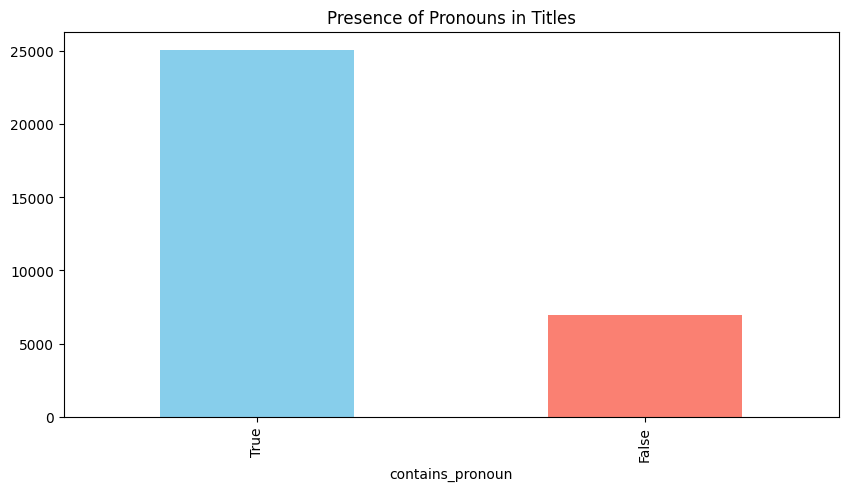

In [87]:
if 'contains_pronoun' not in df.columns:
    pronouns = ['I', 'me', 'my', 'you', 'your', 'he', 'him', 'his', 'she', 'her', 'it', 'its', 'we', 'us', 'our', 'they', 'them', 'their']
    df['contains_pronoun'] = df['title'].apply(lambda x: any(pronoun in x for pronoun in pronouns))

df['contains_pronoun'].value_counts().plot(kind='bar', figsize=(10, 5), color=['skyblue', 'salmon'], title='Presence of Pronouns in Titles')
df['contains_pronoun'].describe()

##### Average Word Length

<bound method NDFrame.describe of 0        6.5556
1        5.5000
2        4.8750
3        4.3636
4        5.4000
          ...  
31995    6.4286
31996    6.2000
31997    4.5000
31998    6.2000
31999    4.8000
Name: average_word_length, Length: 32000, dtype: float64>

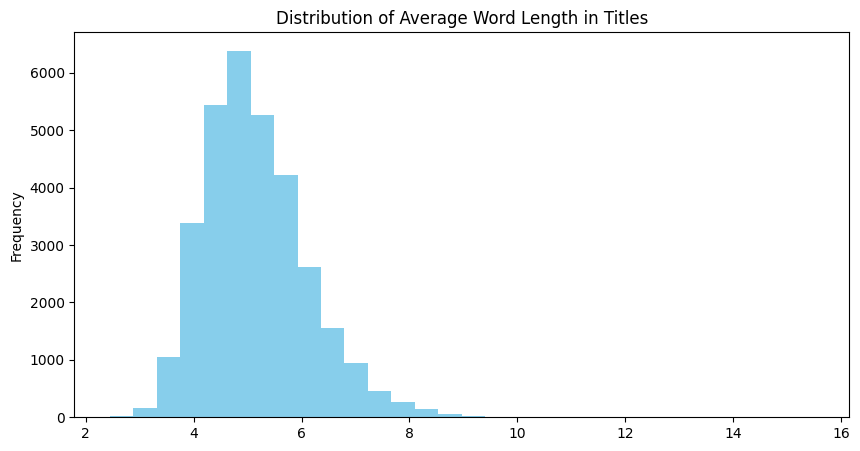

In [88]:
if 'average_word_length' not in df.columns:
    df['average_word_length'] = df['title'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()) if len(x.split()) > 0 else 0)
    df['average_word_length'] = df['average_word_length'].astype(float).round(4)
    
df['average_word_length'].plot(kind='hist', bins=30, figsize=(10, 5), color='skyblue', title='Distribution of Average Word Length in Titles')
df['average_word_length'].describe

In [89]:
# Remove unnecessary columns
if 'upper_lower_ratio' in df.columns:
    del df['upper_lower_ratio']
if 'number_of_superlatives' in df.columns:
    del df['number_of_superlatives']
if 'contains_exclamation' in df.columns:
    del df['contains_exclamation']
if 'contains_question_mark' in df.columns:
    
    del df['contains_question_mark']


In [93]:
df.head(10)

,title,clickbait,title_length,title_world_count,title_uppercase_count,number_of_special_characters,digit_count,has_number,starts_with_question,contains_quotation,contains_pronoun,average_word_length
0,""".asia"" domain applications near 300,000 on op...",0,67,9,0,4,6,True,False,True,False,6.5556
1,"""1 Indian + 1 Indian = Unrelatable"": Televisio...",1,64,10,6,6,2,True,False,True,True,5.5000
2,"""7th Heaven"" television series comes to an end",0,46,8,1,2,1,True,False,True,True,4.8750
3,"""Arm Glow"" Is Your New Life Goal, Thanks To Lu...",1,58,11,11,4,0,False,False,True,True,4.3636
4,"""Beans Memes"" Is The Only Twitter Account That...",1,63,10,10,2,0,False,False,True,True,5.4000
5,"""Bigoted woman"": controversial Gordon Brown re...",0,65,9,3,3,0,False,False,True,False,6.3333
6,"""Black Mirror"" Creator On David Cameron's PigG...",1,81,13,14,7,0,False,False,True,True,5.3077
7,"""Black box"" found near crash site of Ethiopian...",0,62,10,3,2,0,False,False,True,True,5.3000
8,"""Black-ish"" Will Tackle The N-Word In Season P...",1,53,8,9,4,0,False,False,True,True,5.7500
9,"""Brooklyn"" Star Saoirse Ronan Actually Wants T...",1,64,10,10,2,0,False,False,True,False,5.5000


## 3. Machine Learning

### Naive Bayes

In [99]:
X = df.title
y = df.clickbait

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
vectorizer = TfidfVectorizer(
    max_features=10_000,
    ngram_range=(1, 2)
)

In [100]:
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [ ]:
y_pred = model.predict(X_test_tfidf)

In [106]:
print(f'Accuracy: {accuracy_score(y_pred, y_test)}')
print(f'Classification report:\n{classification_report(y_pred, y_test)}')
print(f'Confusion matrix:\n{confusion_matrix(y_pred, y_test)}')

Accuracy: 0.96640625
Classification report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3132
           1       0.98      0.96      0.97      3268

    accuracy                           0.97      6400
   macro avg       0.97      0.97      0.97      6400
weighted avg       0.97      0.97      0.97      6400

Confusion matrix:
[[3055   77]
 [ 138 3130]]


### Random Forest